In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.model_selection import train_test_split

In [2]:
class create_train_test():
    
    df = pd.DataFrame()
    X_train = X_test = y_train = y_test = pd.DataFrame()
    
    def __init__(self):
        self.df = pd.read_csv('../../data/processed/processed_corpus.csv')
        
    def split_data(self):
        
        target_col = ['document_id','cat','subcat']
        target = self.df[target_col]
        self.df.drop('cat',axis=1,inplace=True)
        self.df.drop('subcat',axis=1,inplace=True)
        self.df.drop('Unnamed: 0',axis=1,inplace=True)         
        #print("the data columns ", self.df.columns)        
        #print("The target columns ", target.columns)
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.df, target, test_size=0.33, random_state=42)
         
   
    def getdataframe(self):
        return(self.df)
    
    def gettraindata(self):
        return pd.concat([self.X_train,self.y_train],axis=1)
    
    def gettestdata(self):
         return pd.concat([self.X_test,self.y_test],axis=1)
    
    def write_to_file(self):
        
        train = pd.merge(self.X_train,self.y_train)
        train.to_csv("../../data/processed/train.csv")
        self.X_test.to_csv("../../data/processed/test.csv")
        self.y_test.to_csv("../../data/processed/test_label.csv")
     

In [3]:
dataset = create_train_test()
dataset.split_data()

In [4]:
dataset.write_to_file()

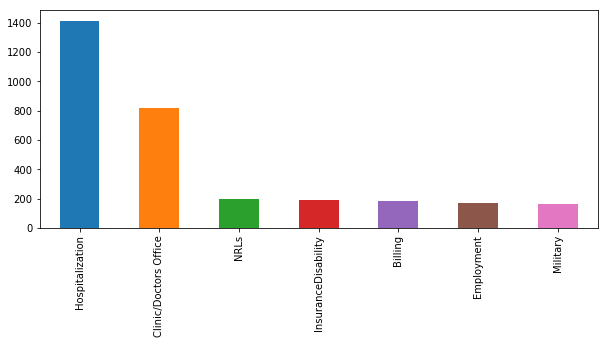

In [5]:
dataset = create_train_test()
#Visualize the data before splitting
df = dataset.getdataframe()
fig = plt.figure(figsize=(10,4))
df.cat.value_counts().plot.bar(ylim=0)
plt.show()

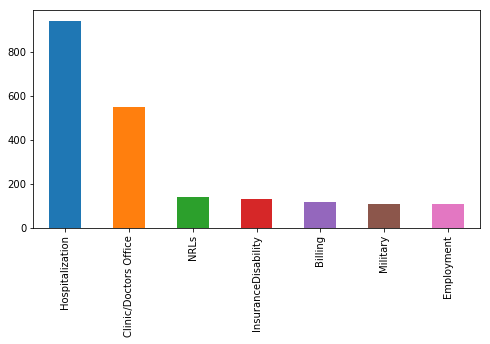

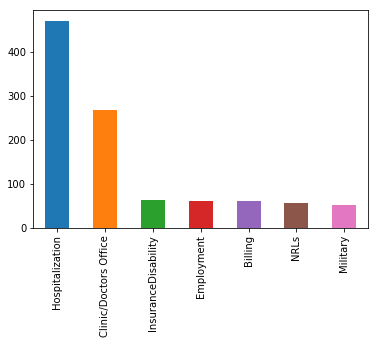

In [6]:
#Visualize the data after splitting
dataset.split_data()

train = dataset.gettraindata()

test = dataset.gettestdata()

fig = plt.figure(figsize=(8,4))
train.cat.value_counts().plot.bar(ylim=0)
plt.show()


test.cat.value_counts().plot.bar(ylim=0)
plt.show()

In [7]:
chk1 = pd.read_csv('../../data/processed/processed_corpus.csv')

chk1.head()

,Unnamed: 0,cat,content,document_id,no_pages,subcat,ques_cnt,no_words
0,0,InsuranceDisability,insurer insurer insurer name associated i...,FL001214112,1,Insurance/DisabilityCorrespondence,0,93
1,1,InsuranceDisability,labor employment security office disability de...,FL001242428,1,Insurance/DisabilityCorrespondence,0,101
2,2,InsuranceDisability,please insurer name staple area name claim ...,FL001213947,1,Insurance/DisabilityCorrespondence,4,150
3,3,InsuranceDisability,insurer insurer name associated insurance co...,FL001212324,1,Insurance/DisabilityCorrespondence,6,137
4,4,InsuranceDisability,department appeal decision careful compassiona...,FL001804295,1,Insurance/DisabilityCorrespondence,8,130
